<a href="https://colab.research.google.com/github/nguyengiapphuongduy/ml-191/blob/master/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class PCA

##### Calculate the covariance matrix:
$$\mathbf{\hat{x}_n} = \mathbf{x_n} - \mathbf{\bar{x}}$$
$$S = \frac{1}{N}\hat{X}\hat{X}^T$$
##### Find eigenvalues, eigenvectors:
$$S u=\lambda u$$

In [0]:
class MyPCA():
    def __init__(self, n_components=1, use_svd=False):
        self.n_components = n_components
        self.use_svd = use_svd

    def fit(self, X):
        N = X.shape[0]
        self.mean_ = X.sum(axis=0)/N
        Xcenter = X - self.mean_
        if self.use_svd:
            u, singular_values, self.eigen_vectors_ = np.linalg.svd(Xcenter)
            self.explained_variance_ = singular_values*singular_values
        else:
            cov = Xcenter.T.dot(Xcenter)/N
            self.explained_variance_, self.eigen_vectors_ = np.linalg.eigh(cov)
            self.eigen_vectors_ = self.eigen_vectors_[::-1, :]
        self.components_ = -self.eigen_vectors_[:self.n_components, :]

    def transform(self, X):
        Xcenter = X - self.mean_
        return Xcenter.dot(self.components_.T)

    def inverse_transform(self, Xu):
        return Xu.dot(self.components_) + self.mean_

# Apply

### Generate Input

Generate the $10$ input points, assume that $\text{mean} = (0,0)$ and the covariance matrix is $\begin{pmatrix}
4 & 3\\
3 & 2.5
\end{pmatrix}$

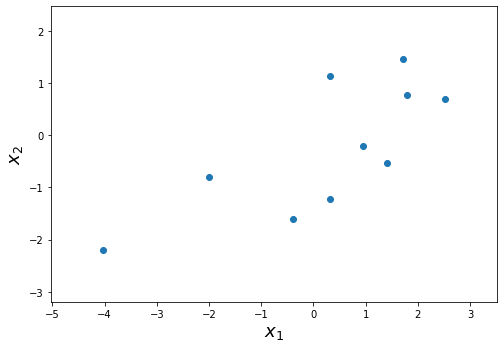

In [0]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

N = 10
X = np.random.multivariate_normal([0, 0], [[4, 2], [2, 2]], N)

plt.figure(figsize=(8, 8))
plt.axes().set_aspect('equal')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
xmin, ymin = X.min(axis=0) - 1
xmax, ymax = X.max(axis=0) + 1
plt.axis((xmin, xmax, ymin, ymax))
plt.scatter(X[:, 0], X[:, 1])
pass

### Fit

In [0]:
from sklearn.decomposition import PCA

skPCA = PCA(n_components=1)
skPCA.fit(X)

myPCA = MyPCA(n_components=1, use_svd=False)
myPCA.fit(X)

mySVD = MyPCA(n_components=1, use_svd=True)
mySVD.fit(X)

### Compare results

In [0]:
def compare(vec1, vec2):
    '''check if two vectors are have the same direction'''
    div = vec1/vec2
    return np.allclose(div, div[0])

skpca = skPCA.components_
mypca = myPCA.components_
mysvd = mySVD.components_
print('sklearn PCA:', skpca, 'my implement:', mypca, 'use SVD:', mysvd,
      'My PCA == sklearn: {}'.format(compare(mypca, skpca)),
      'My SVD-enabled PCA == sklearn: {}'.format(compare(mysvd, skpca)), sep='\n')

sklearn PCA:
[[-0.88015023 -0.47469524]]
my implement:
[[0.88015023 0.47469524]]
use SVD:
[[0.88015023 0.47469524]]
My PCA == sklearn: True
My SVD-enabled PCA == sklearn: True


In [0]:
skpca = skPCA.transform(X)
mypca = myPCA.transform(X)
mysvd = mySVD.transform(X)
print('sklearn PCA:', skpca, 'my implement:', mypca, 'use SVD:', mysvd,
      'My PCA == sklearn: {}'.format(compare(mypca, skpca)),
      'My SVD-enabled PCA == sklearn: {}'.format(compare(mysvd, skpca)), sep='\n')

sklearn PCA:
[[-1.8322961 ]
 [-2.43771974]
 [ 0.41602236]
 [ 1.21351434]
 [-0.62593966]
 [-0.70545206]
 [ 4.69616559]
 [-0.87694212]
 [ 2.24679849]
 [-2.0941511 ]]
my implement:
[[ 1.8322961 ]
 [ 2.43771974]
 [-0.41602236]
 [-1.21351434]
 [ 0.62593966]
 [ 0.70545206]
 [-4.69616559]
 [ 0.87694212]
 [-2.24679849]
 [ 2.0941511 ]]
use SVD:
[[ 1.8322961 ]
 [ 2.43771974]
 [-0.41602236]
 [-1.21351434]
 [ 0.62593966]
 [ 0.70545206]
 [-4.69616559]
 [ 0.87694212]
 [-2.24679849]
 [ 2.0941511 ]]
My PCA == sklearn: True
My SVD-enabled PCA == sklearn: True


### Plot

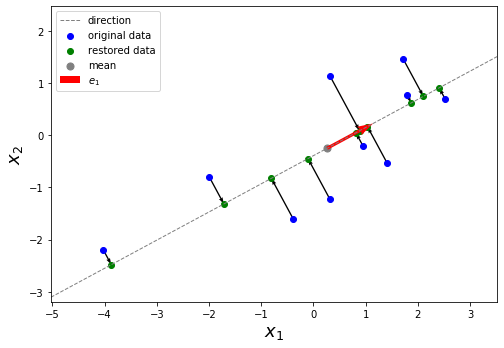

In [0]:
center = myPCA.mean_
Xnew = myPCA.inverse_transform(myPCA.transform(X))
direct = myPCA.components_[0]

plt.figure(figsize=(8, 8))
plt.axes().set_aspect('equal')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
xmin, ymin = X.min(axis=0) - 1
xmax, ymax = X.max(axis=0) + 1
plt.axis((xmin, xmax, ymin, ymax))

x_plot = np.linspace(xmin, xmax, 100) # b(x-x0) - a(y-y0)=0
y_plot = direct[1]/direct[0]*(x_plot - center[0]) + center[1]
plt.plot(x_plot, y_plot, '--', color='gray', linewidth=1, label='direction')
plt.quiver(X[:, 0], X[:, 1], Xnew[:, 0] - X[:, 0], Xnew[:, 1] - X[:, 1],
           scale_units='xy', scale=1, color='black', width=0.003)
plt.scatter(X[:, 0], X[:, 1], color='blue', label='original data')
plt.scatter(Xnew[:, 0], Xnew[:, 1], color='green', label='restored data')
plt.scatter(center[0], center[1], color='gray', s=[50], label='mean')
plt.quiver(center[0], center[1], direct[0], direct[1],
           scale_units='xy', scale=1, color='red', width=0.007, label='$e_1$')
plt.legend()
pass

In [0]:
inp = np.random.randint(0, 100, (30, 10))

sk = PCA(n_components=2)
sk.fit(X)

my1 = MyPCA(n_components=2, use_svd=False)
my1.fit(X)

my2 = MyPCA(n_components=2, use_svd=True)
my2.fit(X)

In [0]:
print(sk.components_)
print(my1.components_)
print(my1.components_)

[[-0.88015023 -0.47469524]
 [-0.47469524  0.88015023]]
[[ 0.88015023  0.47469524]
 [-0.47469524  0.88015023]]
